# Use Cases
In this notebook, we create the CLaP + competitors state sequence plot, used for the use cases.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import sys

sys.path.append("../../")

import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)

from src.utils import load_tssb_datasets, load_has_datasets
from scipy.stats import rankdata
import seaborn as sns

from src.visualization import plot_state_detection, plot_state_transition_graph

sns.set_theme()
sns.set_color_codes()


We start by loading a data set and the competitor results.

In [3]:
dataset = "TSSB"
competitors = ("CLaP", "C2F", "Time2State")

In [4]:
df_data = load_tssb_datasets()
df_data

,dataset,window_size,change_points,labels,time_series
0,Adiac,10,"[572, 1012, 1232]","[0, 1, 2, 4]","[1.681146, 1.383394, 1.029389, 0.688386, 0.354..."
1,ArrowHead,10,[753],"[0, 1]","[-1.957721, -1.858082, -1.657983, -1.420794, -..."
2,Beef,50,[705],"[0, 1]","[-0.380818, -0.352238, -0.295392, -0.225041, -..."
3,BeetleFly,10,[1280],"[0, 1]","[1.114805, 0.774403, 0.477129, 0.115781, -0.24..."
4,BirdChicken,20,[1280],"[0, 1]","[1.697714, 1.439032, 1.22287, 0.99708, 0.76479..."
5,Car,20,"[577, 1154, 1550]","[0, 1, 2, 3]","[1.451648, 1.030174, 0.531853, 0.040229, -0.40..."
6,CBF,20,"[384, 704]","[1, 0, 2]","[-1.27713, -0.689811, -0.901181, -0.937038, -0..."
7,Chinatown,10,[],[0],"[0.025935, -0.435655, -0.608168, -0.81565, -1...."
8,ChlorineConcentration,10,[2365],"[0, 2]","[2.496227, 1.046743, 0.391124, 0.607525, -0.22..."
9,CinCECGTorso,10,"[2663, 5121]","[1, 2, 3]","[-0.118215, -0.115326, -0.111855, -0.1229, -0...."


In [5]:
np_cols = ["true_cps", "found_cps", "found_labels"]

converters = {
    col: lambda val: np.array([]) if len(val) == 0 else np.array(eval(val)) for col
    in np_cols}

df_scores_clap = pd.read_csv(f"../../experiments/state_detection/{dataset}_CLaP.csv.gz", converters=converters)
df_scores_c2f = pd.read_csv(f"../../experiments/state_detection/{dataset}_ClaSP2Feat.csv.gz", converters=converters)
df_scores_t2s = pd.read_csv(f"../../experiments/state_detection/{dataset}_Time2State.csv.gz", converters=converters)
df_scores_t2s

,dataset,true_cps,found_cps,found_labels,f1_score,covering_score,ami_score,runtime
0,Adiac,"[572, 1012, 1232]","[320, 330, 340, 350, 430, 440, 450, 460, 540, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.146,0.401,0.069,92.383091
1,ArrowHead,[753],"[20, 520, 1476, 1496]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.286,0.699,0.454,103.002740
2,Beef,[705],"[160, 376, 456, 586, 660, 790, 936, 1140, 1386...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.154,0.328,0.461,100.507395
3,BeetleFly,[1280],"[20, 110, 420, 706, 726, 1136, 1386, 1426, 145...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.067,0.307,0.459,109.385878
4,BirdChicken,[1280],"[20, 140, 406, 650, 1250, 1540, 1610, 1630, 16...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.133,0.401,0.429,101.567442
5,Car,"[577, 1154, 1550]","[366, 370, 376, 490, 546, 550, 770, 1030, 1170...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.235,0.580,0.460,85.806850
6,CBF,"[384, 704]","[326, 446, 556, 716, 866]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.222,0.644,0.566,103.758907
7,Chinatown,[],[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.000,1.000,1.000,2.655208
8,ChlorineConcentration,[2365],"[20, 270, 576, 626, 800, 1130, 1240, 1250, 142...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.027,0.091,0.097,134.009395
9,CinCECGTorso,"[2663, 5121]","[406, 786, 1016, 1220, 1416, 1630, 1776, 1786,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.115,0.168,0.287,112.091520


Now, we plot the state detection for a given time series.

<Axes: ylabel='T2S'>

<Figure size 640x480 with 0 Axes>

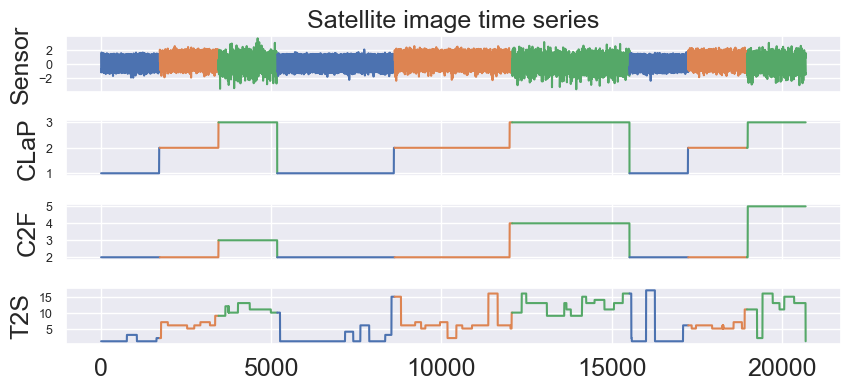

In [6]:
idx = 15
data_row = df_data.iloc[idx]

states_clap = df_scores_clap.iloc[idx].found_labels
states_c2f = rankdata(df_scores_c2f.iloc[idx].found_labels, method="dense")
states_t2s = df_scores_t2s.iloc[idx].found_labels

states_size = min(states_clap.shape[0], states_c2f.shape[0], states_t2s.shape[0])
states = np.array([states_clap[:states_size], states_c2f[:states_size], states_t2s[:states_size]]).T

plot_state_detection(
    "Satellite image time series",
    data_row.time_series,
    states + 1,
    change_points=data_row.change_points,
    labels=data_row.labels,
    ylabels=("Sensor", "CLaP", "C2F", "T2S"),
    file_path="../../figures/satellite_image_usecase.pdf"
)

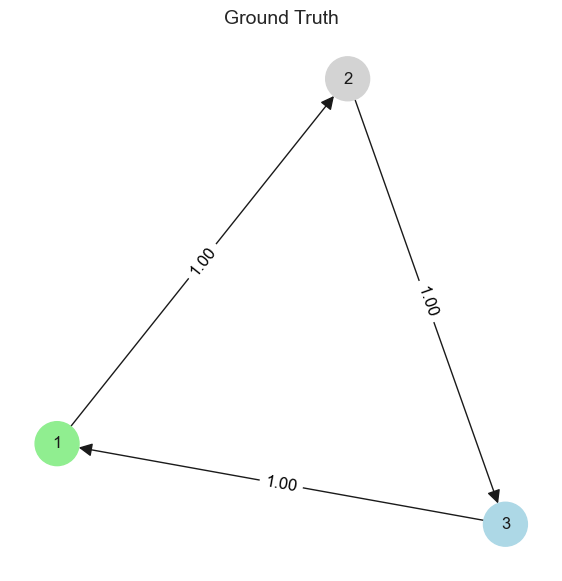

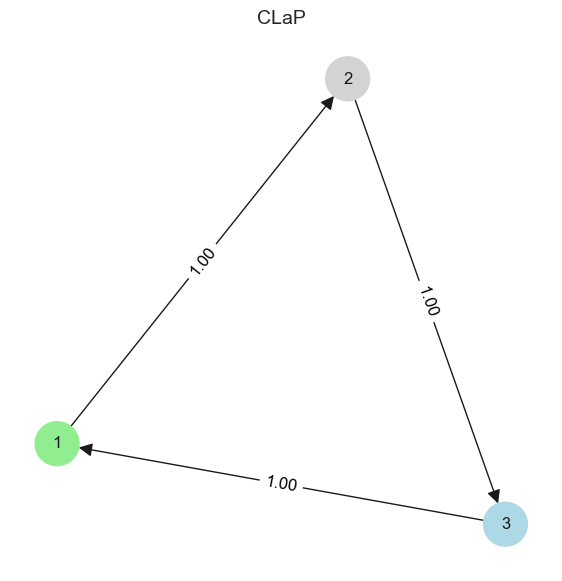

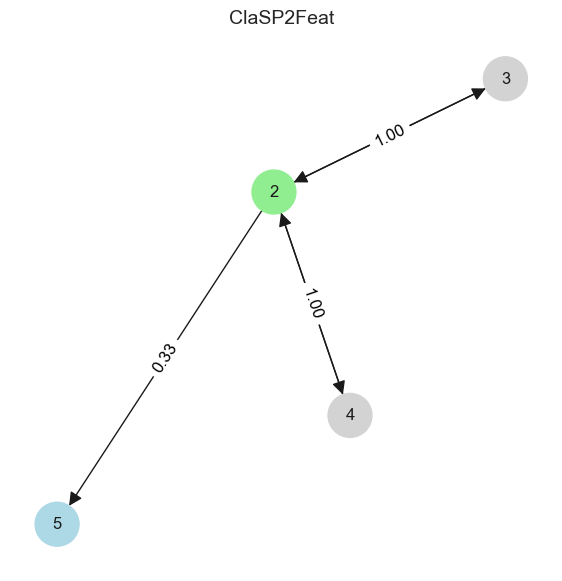

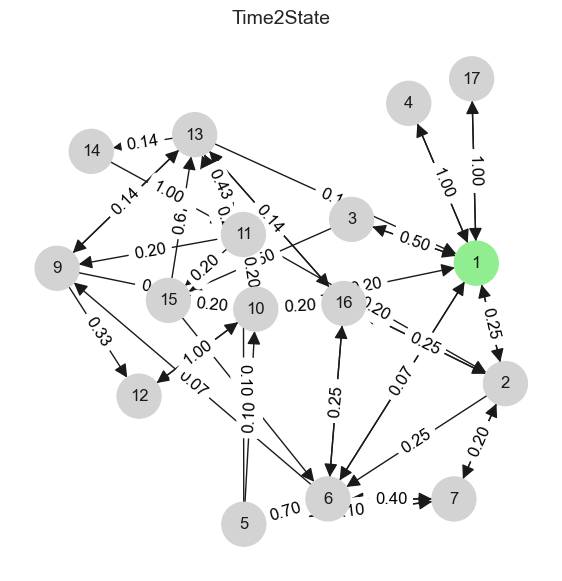

In [7]:
for comp_idx, comp in enumerate(("Ground Truth", "CLaP", "ClaSP2Feat", "Time2State")):
    if comp_idx == 0:
        state_seq = data_row.labels + 1
    else:
        state_seq = states.T[comp_idx - 1] + 1
        state_seq = np.array(
            [state_seq[idx] for idx in range(1, len(state_seq)) if state_seq[idx] != state_seq[idx - 1] or idx == 1])

    plot_state_transition_graph(f"{comp}", state_seq, file_path=f"../../figures/satellite_image_usecase_{comp}.pdf")

We load another data set and the competitor results.

In [8]:
dataset = "HAS"
competitors = ("CLaP", "C2F", "Time2State")

In [9]:
df_data = load_has_datasets()
df_data

,dataset,window_size,change_points,labels,time_series
0,indoor_subject1_routine1 (id125),50,"[1461, 2952, 4473, 5022, 6460]","[1, 0, 1, 2, 0, 3]","[[0.406, -0.4804, 1.775, -0.2425, 1.2022, -0.0..."
1,indoor_subject1_routine1 (id140),50,"[772, 2056, 3521, 4835, 5283, 6893]","[2, 1, 3, 1, 2, 0, 3]","[[-0.2274, 0.5969, -0.5992, -0.159557142857142..."
2,indoor_subject1_routine1 (id93),50,"[1211, 2043, 2836, 3529, 4036]","[2, 4, 0, 1, 3, 4]","[[4.8883, 5.4784, -6.4445, 0.06082307692307692..."
3,indoor_subject1_routine1 (id52),50,"[739, 1433, 2044, 2875, 3589]","[0, 1, 2, 3, 1, 0]","[[-1.2656, -0.5253, -3.9209, -0.47177142857142..."
4,indoor_subject1_routine1 (id221),50,"[1506, 3033, 4477, 5348, 6805]","[2, 0, 2, 3, 0, 1]","[[-0.8136, -0.1392, 0.844, -0.654675, -0.02139..."
5,indoor_subject1_routine1 (id150),50,"[1458, 1887]","[1, 2, 0]","[[3.7652, 1.056, 2.9724, -0.879, 0.1979, -0.03..."
6,indoor_subject2_routine1 (id176),50,"[1431, 1746, 3498, 5240, 6390]","[1, 2, 0, 1, 2, 0]","[[0.8414, -0.4101, 2.9656, -1.1301, -1.8644, 0..."
7,indoor_subject2_routine1 (id231),50,"[1605, 2846, 4136, 5300]","[2, 1, 2, 1, 0]","[[0.0236, -0.7341, -0.6532, -0.043445, -0.0283..."
8,indoor_subject2_routine1 (id103),50,"[1239, 2342, 3513, 3885]","[3, 1, 4, 2, 0]","[[3.5014, 9.5422, 0.8233, -0.04700999999999999..."
9,indoor_subject2_routine1 (id66),50,"[816, 2102, 2795, 3416, 4024, 5190]","[1, 3, 0, 1, 2, 3, 1]","[[0.5602, 0.8112, 1.5514, 0.5205, -0.5253, -0...."


In [10]:
np_cols = ["true_cps", "found_cps", "found_labels"]

converters = {
    col: lambda val: np.array([]) if len(val) == 0 else np.array(eval(val)) for col
    in np_cols}

df_scores_clap = pd.read_csv(f"../../experiments/state_detection/{dataset}_CLaP.csv.gz", converters=converters)
df_scores_c2f = pd.read_csv(f"../../experiments/state_detection/{dataset}_ClaSP2Feat.csv.gz", converters=converters)
df_scores_t2s = pd.read_csv(f"../../experiments/state_detection/{dataset}_Time2State.csv.gz", converters=converters)
df_scores_clap

,dataset,true_cps,found_cps,found_labels,f1_score,covering_score,ami_score,runtime
0,indoor_subject1_routine1 (id125),"[1461, 2952, 4473, 5022, 6460]","[358, 1009, 6487]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.400,0.413,0.518,50.797399
1,indoor_subject1_routine1 (id140),"[772, 2056, 3521, 4835, 5283, 6893]","[624, 2028, 2308, 2700, 3497, 4846, 5159, 5991...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.556,0.713,0.662,55.030836
2,indoor_subject1_routine1 (id93),"[1211, 2043, 2836, 3529, 4036]","[1188, 1604, 2021, 2809, 3534, 4063]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.923,0.884,0.779,41.104015
3,indoor_subject1_routine1 (id52),"[739, 1433, 2044, 2875, 3589]","[702, 3819]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.444,0.429,0.407,35.813036
4,indoor_subject1_routine1 (id221),"[1506, 3033, 4477, 5348, 6805]","[1438, 3032, 4725, 6746]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.727,0.819,0.719,58.630349
5,indoor_subject1_routine1 (id150),"[1458, 1887]",[1561],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.400,0.786,0.739,26.704936
6,indoor_subject2_routine1 (id176),"[1431, 1746, 3498, 5240, 6390]","[325, 718, 1439, 3493, 4419, 4812, 5289]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.571,0.570,0.536,55.182549
7,indoor_subject2_routine1 (id231),"[1605, 2846, 4136, 5300]","[285, 1048, 1576, 2801, 4106, 4393, 4692, 5276...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.667,0.670,0.677,47.415457
8,indoor_subject2_routine1 (id103),"[1239, 2342, 3513, 3885]","[262, 1214, 1969, 2319, 3831]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.545,0.723,0.616,33.618574
9,indoor_subject2_routine1 (id66),"[816, 2102, 2795, 3416, 4024, 5190]",[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.250,0.158,0.000,0.139356


Now, we plot the state detection for a given time series.

<Axes: ylabel='T2S'>

<Figure size 640x480 with 0 Axes>

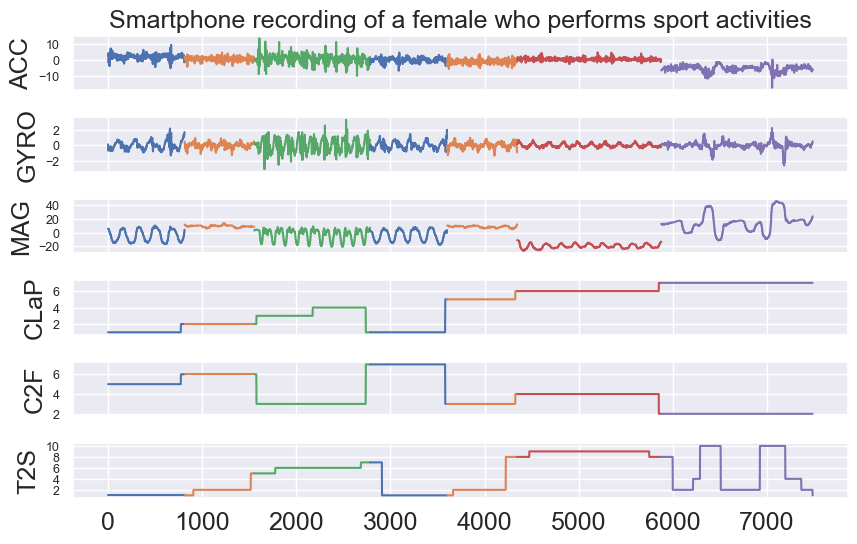

In [11]:
idx = 30  # 16, 30
data_row = df_data.iloc[idx]

states_clap = df_scores_clap.iloc[idx].found_labels
states_c2f = rankdata(df_scores_c2f.iloc[idx].found_labels, method="dense")
states_t2s = df_scores_t2s.iloc[idx].found_labels

states_size = min(states_clap.shape[0], states_c2f.shape[0], states_t2s.shape[0])
states = np.array([states_clap[:states_size], states_c2f[:states_size], states_t2s[:states_size]]).T

plot_state_detection(
    "Smartphone recording of a female who performs sport activities",
    data_row.time_series[:, [0, 3, 6]],
    states + 1,
    change_points=data_row.change_points,
    labels=data_row.labels,
    ylabels=("ACC", "GYRO", "MAG", "CLaP", "C2F", "T2S"),
    file_path="../../figures/har_usecase.pdf"
)

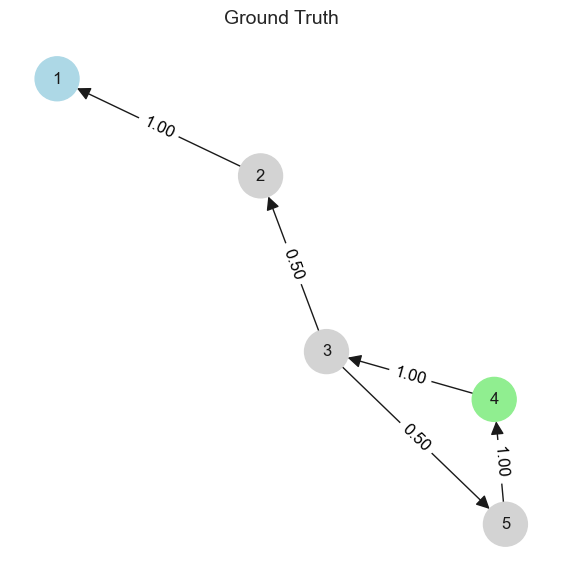

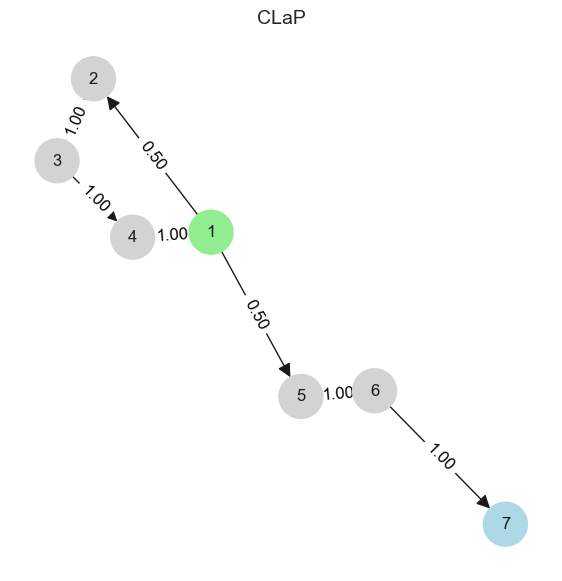

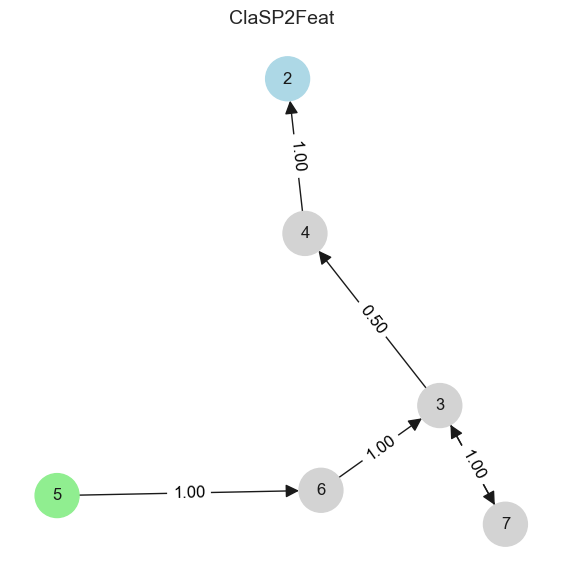

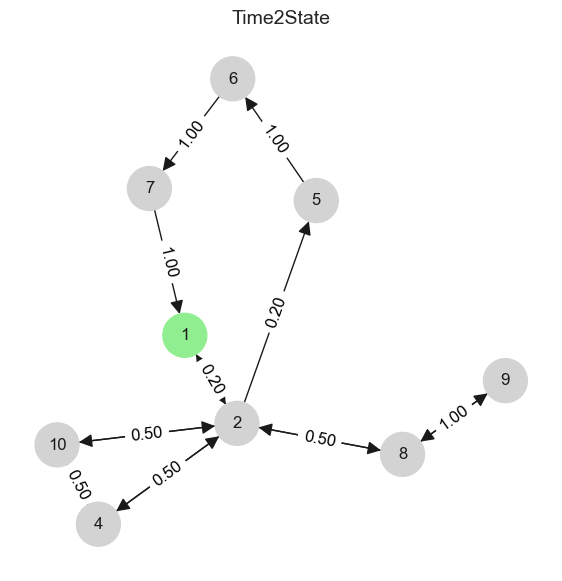

In [12]:
for comp_idx, comp in enumerate(("Ground Truth", "CLaP", "ClaSP2Feat", "Time2State")):
    if comp_idx == 0:
        state_seq = data_row.labels + 1
    else:
        state_seq = states.T[comp_idx - 1] + 1
        state_seq = np.array(
            [state_seq[idx] for idx in range(1, len(state_seq)) if state_seq[idx] != state_seq[idx - 1] or idx == 1])

    plot_state_transition_graph(f"{comp}", state_seq, file_path=f"../../figures/har_usecase_{comp}.pdf")